### Semi-guided Project
#### Idea (from dataquest's [guided project](https://github.com/dataquestio/solutions/blob/master/Mission350Solutions.ipynb)) but carried out with pandas in my solution
***

## Google Play | App Store Data Analysis
***


>Company X builds free to download Android and iOS mobile apps for **English-speaking** users, with the its main revenue coming from in-app ads. Therefore, the more users that see and engage with the ads, the better.\
This project would analyze Google Play and iOS App Store data to help Company X understand what type of apps are likely to attract more users.


In [1]:
import pandas as pd

    Variables assigned
    play for Google Play apps
    appstore for Apple store apps

In [2]:
play = pd.read_csv('googleplaystore.csv')
appstore = pd.read_csv('AppleStore.csv')

   ### First exploration of dataset

>**Appstore**

In [3]:
appstore.info()
appstore.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 899.8+ KB


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1


A brief exploration of the dataset shows that for the Appstore, the entries on columns seem to match rows- all 7197!

>**Google Play**

In [4]:
play.info()
play.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


  On the other hand for google play, there is a mis-match of entries:\
  Rating, Type, Content Rating, Current Ver, Android Ver.

### Cleaning the dataset

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

After importing a few visualization libraries, our first step would be to drop the obvious null values we spotted in the google play dataset

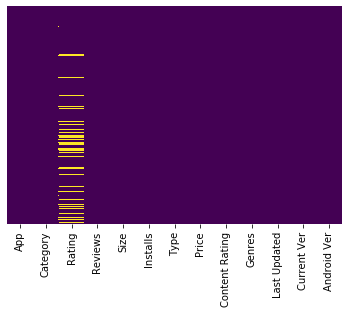

In [6]:
sns.heatmap(play.isnull(),      # Vizualisation of missing data on play by column
            yticklabels=False,
            cbar=False, 
            cmap='viridis')

In [7]:
play.dropna(inplace=True)      # Drop all null values in play

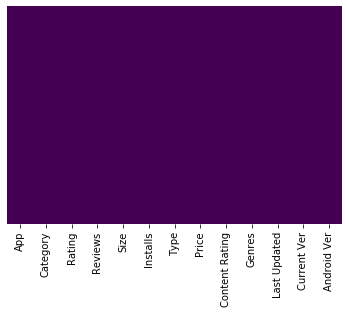

In [8]:
sns.heatmap(play.isnull(),      # Visualization after dropping null values
            yticklabels=False,
            cbar=False, 
            cmap='viridis')

### Cleaning the dataset: checking for duplicates

In [9]:
print('Total number of Appstore app entries is: ')
print(len(appstore['track_name']))
print('Total number of UNIQUE Appstore app entries is: ')
print(appstore['track_name'].nunique()) 

print('Total number of GooglePlay app entries is: ')
print(len(play['App'])) 
print('Total number of UNIQUE GooglePlay app entries is: ')
print(play['App'].nunique())   


Total number of Appstore app entries is: 
7197
Total number of UNIQUE Appstore app entries is: 
7195
Total number of GooglePlay app entries is: 
9360
Total number of UNIQUE GooglePlay app entries is: 
8190


The combined use of the length and unique functions is a simple but effective way to check for duplicates

>**Appstore**

In [10]:
appstore[appstore['track_name'].duplicated() == True]   # View duplicated items Appstore

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


Proper care is applied when dropping duplcates. In the Appstore data, we can deduce the duplicate to drop/keep from the higher rating_count_tot.
For example, this would be the first entry in the duplicate below, as we would assume the higher number of ratings to suggest a more up-to-date entry.

In [11]:
appstore[appstore['track_name']=='Mannequin Challenge']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


In the next step, we sort the rating_count_tot column in ascending order to enable us drop all except the last (the highest rating_count_tot)

In [12]:
appstore = appstore.sort_values('rating_count_tot').drop_duplicates(
    subset = 'track_name',
    keep = 'last')

print(len(appstore['track_name']))   # value now matches unique values

7195


>**Google Play**\
>Same process as in the Appstore above is applied

In [13]:
play[play['App'].duplicated() == True].head()   # view duplicated items Google
                                                # Quite a few, hence .head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


In [14]:
play = play.sort_values('Reviews').drop_duplicates(
    subset = 'App',
    keep = 'last')

print(len(play['App']))   # value now matches unique values

8190


### Cleaning the dataset: removing non-english apps ###

Since Company X is seeking to build an app which targets English speakers, the next step would proceed to drop all non-english speaking apps from our datasets. Since there are actual english apps with non english characters, our criteria for determining a non english app would be any name that has 3 or more non english characters. For this step, a function that iterates through our apps names is created. This function would return boolean values.


In [15]:
def english(a_string):
    non_eng = 0
    for char in a_string:
        if ord(char) > 127:    # ord() function to check between 1 and 127
            non_eng += 1
    if non_eng >= 3:
        return False                
        
    return True


                                # Testing the function

print(english('Instagram'))
print(english('Instachat 😜'))
print(english('电视剧热播'))
print(english('Docs To Go™ Free Office Suite'))

True
True
False
True


>**Appstore**

Our english function applied to apps in appstore.\
The generated Boolean results are assigned to new column in our dataframe.

In [16]:
appstore['english'] = appstore['track_name'].apply(english)

appstore['english'].unique()

array([False,  True])

In [17]:
appstore[appstore.english==False].info()   # display non english apps

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042 entries, 7196 to 813
Data columns (total 17 columns):
id                  1042 non-null int64
track_name          1042 non-null object
size_bytes          1042 non-null int64
currency            1042 non-null object
price               1042 non-null float64
rating_count_tot    1042 non-null int64
rating_count_ver    1042 non-null int64
user_rating         1042 non-null float64
user_rating_ver     1042 non-null float64
ver                 1042 non-null object
cont_rating         1042 non-null object
prime_genre         1042 non-null object
sup_devices.num     1042 non-null int64
ipadSc_urls.num     1042 non-null int64
lang.num            1042 non-null int64
vpp_lic             1042 non-null int64
english             1042 non-null bool
dtypes: bool(1), float64(3), int64(8), object(5)
memory usage: 139.4+ KB


In [18]:
appstore = appstore.drop(appstore[appstore.english==False].index)

len(appstore)  # left with 6153 apps

6153

After dropping 1042 non-english rows and reassigned back to appstore the index value is now 6153, only english.

>**Google Play**\
>Same process as above would be applied

In [19]:
play['english'] = play['App'].apply(english) # english function applied

play[play['english']==False].head(5)    # quick browse to see how our function worked   

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,english
7751,الفاتحون Conquerors,FAMILY,4.5,108130,40M,"5,000,000+",Free,0,Teen,Strategy,"August 3, 2018",1.8.0,4.0 and up,False
8994,DW فارسی By dw-arab.com,NEWS_AND_MAGAZINES,4.7,11,4.4M,"1,000+",Free,0,Everyone,News & Magazines,"March 26, 2017",1.0.0,4.1 and up,False
9200,বাংলাflix,FAMILY,4.2,1111,7.3M,"100,000+",Free,0,Everyone,Entertainment,"June 5, 2018",3.6.1,4.1 and up,False
9105,Météo Algérie DZ,WEATHER,4.1,1238,4.7M,"100,000+",Free,0,Everyone,Weather,"December 17, 2014",1.1.6,2.3 and up,False
4193,صور حرف H,ART_AND_DESIGN,4.4,13,4.5M,"1,000+",Free,0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up,False


In [20]:
play[play['english']==False].info() #44 non english apps detected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 7751 to 10763
Data columns (total 14 columns):
App               44 non-null object
Category          44 non-null object
Rating            44 non-null float64
Reviews           44 non-null object
Size              44 non-null object
Installs          44 non-null object
Type              44 non-null object
Price             44 non-null object
Content Rating    44 non-null object
Genres            44 non-null object
Last Updated      44 non-null object
Current Ver       44 non-null object
Android Ver       44 non-null object
english           44 non-null bool
dtypes: bool(1), float64(1), object(12)
memory usage: 4.9+ KB


In [21]:
play = play.drop(play[play.english==False].index) # drop non english apps and reassigned to dataframe

In [22]:
len(play)  # left with 8146 apps

8146

In [23]:
# Since we have no more use for english, we drop the column here

appstore.drop('english',axis=1,inplace=True)
play.drop('english',axis=1,inplace=True)

### Cleaning the dataset: removing paid apps

>**Appstore**

In [24]:
appstore[appstore['price']==0]  # object denoting free apps

appstore = appstore[appstore['price']==0] # reassigned to appstore

In [25]:
appstore.sort_index(inplace=True)
len(appstore)

3201

>**Google Play**

In [26]:
# values in 'Price' column on google play are stored as strings

play = play[play['Price']=='0']

In [27]:
play.sort_index(inplace=True)
len(play)

7547

### Cleaning the dataset: Dropping unusable columns ###

Columns which are outside of the scope of this analysis are dropped.

In [28]:
appstore.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [29]:
appstore.drop(['id',
               'size_bytes',
               'rating_count_ver',
               'ver',
               'sup_devices.num',
               'ipadSc_urls.num',
               'lang.num', 
               'vpp_lic',
               'user_rating',
               'user_rating_ver',
               'price',
               'currency'],
              axis=1, inplace=True)

In [30]:
play.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [31]:
play.drop(['Rating', 'Reviews', 'Size','Type',
       'Price', 'Content Rating','Last Updated', 'Current Ver',
       'Android Ver'], axis=1, inplace=True)

## Analyzing the data
***

#### As per project objective, Company X tries to find the most successful type of app on both platforms. 
***

In [32]:
%matplotlib inline
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Most popular apps- Genre frequency

>**Appstore and Google Play**
 

Genre frequency count:

In [33]:
appstore['prime_genre'].value_counts().head(10)   # Appstore, the top 10

Games                1864
Entertainment         251
Photo & Video         160
Education             118
Social Networking     106
Shopping               83
Utilities              79
Sports                 69
Music                  66
Health & Fitness       65
Name: prime_genre, dtype: int64

In [34]:
appstore['prime_genre'].iplot(kind='hist', colors ='#9467bd') #Visualisation

In [35]:
play['Category'].value_counts().head(10)     # Google play, the top 10

FAMILY           1487
GAME              814
TOOLS             653
FINANCE           289
PRODUCTIVITY      282
LIFESTYLE         278
BUSINESS          253
PHOTOGRAPHY       248
SPORTS            237
COMMUNICATION     234
Name: Category, dtype: int64

In [36]:
play['Category'].iplot(kind='hist')    # Visualisation

Now, we define a function to get the percentages of the above values.

In [37]:
def genre_percentage(dataset,column):
    return (dataset[column].value_counts()/len(dataset)) * 100    

In [38]:
genre_percentage(appstore, 'prime_genre')   # Appstore genre percentage

Games                58.231803
Entertainment         7.841300
Photo & Video         4.998438
Education             3.686348
Social Networking     3.311465
Shopping              2.592940
Utilities             2.467979
Sports                2.155576
Music                 2.061856
Health & Fitness      2.030615
Productivity          1.749453
Lifestyle             1.562012
News                  1.343330
Travel                1.249609
Finance               1.093408
Weather               0.874727
Food & Drink          0.812246
Reference             0.531084
Business              0.531084
Book                  0.374883
Navigation            0.187441
Medical               0.187441
Catalogs              0.124961
Name: prime_genre, dtype: float64

In [39]:
genre_percentage(play, 'Category')

FAMILY                 19.703193
GAME                   10.785743
TOOLS                   8.652445
FINANCE                 3.829336
PRODUCTIVITY            3.736584
LIFESTYLE               3.683583
BUSINESS                3.352325
PHOTOGRAPHY             3.286074
SPORTS                  3.140321
COMMUNICATION           3.100570
HEALTH_AND_FITNESS      3.087319
PERSONALIZATION         3.074069
MEDICAL                 3.007818
SOCIAL                  2.663310
NEWS_AND_MAGAZINES      2.623559
TRAVEL_AND_LOCAL        2.371803
SHOPPING                2.358553
BOOKS_AND_REFERENCE     2.106797
VIDEO_PLAYERS           1.921293
DATING                  1.735789
MAPS_AND_NAVIGATION     1.470783
EDUCATION               1.364781
FOOD_AND_DRINK          1.219027
ENTERTAINMENT           1.113025
AUTO_AND_VEHICLES       0.954021
WEATHER                 0.848019
LIBRARIES_AND_DEMO      0.834769
HOUSE_AND_HOME          0.781768
ART_AND_DESIGN          0.715516
COMICS                  0.689016
PARENTING 

Appstore english applications are heavily dominated by games with a whooping 58.23%! The next popular genre is Entertainment account for just 7%. Both of the top two application focused on fun.
***
In Google Play however, there is no clear dominance of gaming applictions (which account for 10%, second to 'Family' category with 19). The distribution is generally more balanced than ios counterparts.

### Most popular genre- User base

>**Appstore**

On the appstore dataset, there is no value showing the number of users per app, therefore, we would estimate this using the rating_count_tot column, which denotes the number of user ratings.

In [40]:
appstore.groupby(['prime_genre'])[
    'rating_count_tot'].mean().sort_values(ascending=False)

prime_genre
Navigation           86090.333333
Reference            79350.470588
Social Networking    71548.349057
Music                57326.530303
Weather              52279.892857
Book                 46384.916667
Food & Drink         33333.923077
Finance              32367.028571
Photo & Video        28441.543750
Travel               28243.800000
Shopping             27230.734940
Health & Fitness     23298.015385
Sports               23008.898551
Games                22910.831009
News                 21248.023256
Productivity         21028.410714
Utilities            19156.493671
Lifestyle            16815.480000
Entertainment        14195.358566
Business              7491.117647
Education             7003.983051
Catalogs              4004.000000
Medical                612.000000
Name: rating_count_tot, dtype: float64

At first glance, **Navigation** apps seem to be the most popular, only a few apps account for the majority of the user base as shown below:

In [41]:
appstore[appstore['prime_genre']=='Navigation'][
    ['track_name','rating_count_tot']]

,track_name,rating_count_tot
49,"Waze - GPS Navigation, Maps & Real-time Traffic",345046
130,Google Maps - Navigation & Transit,154911
881,Geocaching®,12811
1633,CoPilot GPS – Car Navigation & Offline Maps,3582
3987,ImmobilienScout24: Real Estate Search in Germany,187
6033,Railway Route Search,5


A similar scenario also applies to the second most common genre by user base- **Reference**, with the Bible and Dictionary accounting for most of the user base, as shown below:

In [42]:
appstore[appstore['prime_genre']=='Reference'][
    ['track_name','rating_count_tot']]

,track_name,rating_count_tot
6,Bible,985920
90,Dictionary.com Dictionary & Thesaurus,200047
335,Dictionary.com Dictionary & Thesaurus for iPad,54175
551,Google Translate,26786
715,"Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...",18418
738,New Furniture Mods - Pocket Wiki & Game Tools ...,17588
757,Merriam-Webster Dictionary,16849
913,Night Sky,12122
1106,City Maps for Minecraft PE - The Best Maps for...,8535
1451,LUCKY BLOCK MOD ™ for Minecraft PC Edition - T...,4693


>**Google Play**

With the Google play, we're lucky to have values estimating the number of installs in the 'Installs' column, however inaccurate.

In [43]:
play['Installs'][0]

'10,000+'

As shown above, the resultant values are strings, therefore we create a function to convert the strings to integers and then reassign the results back to 'Installs'

In [44]:
def str_to_int(series):
    
    num = series.split(',')     # to split by the comma
    num = ''.join(num)          # to join values without the comma
    num = num[:-1]              # to eliminate '+' charcter
    
    return int(num)

In [45]:
play['Installs'] = play['Installs'].apply(str_to_int) #function applied to 'Installs' and reassigned

In [46]:
play.groupby(['Category'])[
    'Installs'].mean().sort_values(ascending=False)

Category
COMMUNICATION          4.716616e+07
SOCIAL                 2.730266e+07
VIDEO_PLAYERS          2.711535e+07
PRODUCTIVITY           2.053762e+07
PHOTOGRAPHY            1.873897e+07
GAME                   1.629804e+07
TRAVEL_AND_LOCAL       1.617138e+07
TOOLS                  1.224882e+07
NEWS_AND_MAGAZINES     1.196005e+07
ENTERTAINMENT          1.171976e+07
BOOKS_AND_REFERENCE    1.047616e+07
SHOPPING               7.866974e+06
PERSONALIZATION        6.590881e+06
WEATHER                5.627891e+06
HEALTH_AND_FITNESS     4.907868e+06
SPORTS                 4.620834e+06
MAPS_AND_NAVIGATION    4.486905e+06
FAMILY                 4.171791e+06
BUSINESS               2.753974e+06
FOOD_AND_DRINK         2.300193e+06
ART_AND_DESIGN         2.096502e+06
EDUCATION              1.837379e+06
LIFESTYLE              1.789212e+06
HOUSE_AND_HOME         1.635119e+06
FINANCE                1.574833e+06
DATING                 1.075583e+06
COMICS                 8.636750e+05
LIBRARIES_AND_DEMO 

Communication apps hold the top spot with an average of 47,166,160 installs. However, similar to the scenario in ios data, our communication install count is higly dominated by only a few apps, as shown below:

In [47]:
play[play['Category']=='COMMUNICATION'][['App','Installs']].sort_values(
    by='Installs',ascending=False).head(20)

,App,Installs
336,WhatsApp Messenger,1000000000
411,Google Chrome: Fast & Secure,1000000000
391,Skype - free IM & video calls,1000000000
451,Gmail,1000000000
382,Messenger – Text and Video Chat for Free,1000000000
464,Hangouts,1000000000
420,UC Browser - Fast Download Private & Secure,500000000
4676,Viber Messenger,500000000
465,imo free video calls and chat,500000000
371,Google Duo - High Quality Video Calls,500000000


The top six apps: WhatsApp Messenger, Google Chrome, Skype, Gmail, Messenger and Hangouts each have over a billion installs, with a couple of others having over 100 and 500 million installs. Thus the values are not extremely reliable.

By dropping the relativley few apps with over 100 milllion installs, the Communication category average drops to about 4,525,997 from the original 47,166,160 as shown below:

In [48]:
play[(play['Category']=='COMMUNICATION')&   # Communication category
     (play['Installs']<100000000)][         # Where Installs are less than 100 million
    'Installs'].mean()                      # mean

4525997.729468599

We can expect the same scenario to occur over some of the top genres\
Once again, here are the top genres on Google Play and iOS Appstore by average user base:

| Google Play Genres        | Appr avg. user base||Appstore Genres | Appr. avg user base |
|-----------------:|:----------------|          |------:|:---------------|
|COMMUNICATION|        47,166,160|               |Navigation|86090.333333|
|SOCIAL |             27,302,660|                |Reference|79350.470588|
|VIDEO_PLAYERS |         27,115,350|             |Social Networking|71548.349057|
|PRODUCTIVITY |          20,537,620|             |Music|57326.530303|
|PHOTOGRAPHY  |          18,738,970|             |Weather|52279.892857|
|GAME        |           16,298,040|             |Book|46384.916667|
|TRAVEL_AND_LOCAL   |    16,171,380|             |Food & Drink|33333.923077|
|TOOLS         |         12,248,820|             |Finance|32367.028571|
|NEWS_AND_MAGAZINES |    11,960,050|             |Photo & Video|28441.543750|
|ENTERTAINMENT  |        11,719,760|             |Travel|28243.800000|
|BOOKS_AND_REFERENCE |   10,476,160|             |Shopping|27230.734940|

These 11 are selected as the genres whose mean user base is above 10 million, derived from Google Play installs, which is chosen as a better user base indicator over ratings.\
The standard dveiation function can be used to inform Company X of caveats within each genre's popularity on both platforms. For the purpose of relativity, we would scale the 'Installs' and 'rating_count_tot' columns before calculating the standard deviation.

In [49]:
from sklearn.preprocessing import scale
appstore['rating_count_tot_scaled'] = scale(appstore['rating_count_tot'])
play['Installs_scaled'] = scale(play['Installs'])

>**Appstore**

In [50]:
print('Navigation:       ' + str(round(appstore[appstore['prime_genre']=='Navigation']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Reference:        ' + str(round(appstore[appstore['prime_genre']=='Reference']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Social Networking:' + str(round(appstore[appstore['prime_genre']=='Social Networking']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Music:            ' + str(round(appstore[appstore['prime_genre']=='Music']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Weather:          ' + str(round(appstore[appstore['prime_genre']=='Weather']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Book:             ' + str(round(appstore[appstore['prime_genre']=='Book']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Food & Drink:     ' + str(round(appstore[appstore['prime_genre']=='Food & Drink']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Finance:          ' + str(round(appstore[appstore['prime_genre']=='Finance']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Photo & Video:    ' + str(round(appstore[appstore['prime_genre']=='Photo & Video']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Travel:           ' + str(round(appstore[appstore['prime_genre']=='Travel']['rating_count_tot_scaled'].std(),2)))
print('\n')
print('Shopping:         ' + str(round(appstore[appstore['prime_genre']=='Shopping']['rating_count_tot_scaled'].std(),2)))

Navigation:       1.28


Reference:        2.18


Social Networking:2.84


Music:            1.67


Weather:          0.98


Book:             0.69


Food & Drink:     0.72


Finance:          0.55


Photo & Video:    1.59


Travel:           0.73


Shopping:         0.55


>**Google Play**

In [51]:
print('COMMUNICATION:      ' + str(round(play[play['Category']=='COMMUNICATION']['Installs_scaled'].std(),2)))
print('\n') 
print('SOCIAL:             ' + str(round(play[play['Category']=='SOCIAL']['Installs_scaled'].std(),2)))
print('\n')
print('VIDEO_PLAYERS:      ' + str(round(play[play['Category']=='VIDEO_PLAYERS']['Installs_scaled'].std(),2)))
print('\n')
print('PRODUCTIVITY:       ' + str(round(play[play['Category']=='PRODUCTIVITY']['Installs_scaled'].std(),2)))
print('\n')
print('PHOTOGRAPHY:        ' + str(round(play[play['Category']=='PHOTOGRAPHY']['Installs_scaled'].std(),2)))
print('\n')
print('GAME:               ' + str(round(play[play['Category']=='GAME']['Installs_scaled'].std(),2)))
print('\n')
print('TRAVEL_AND_LOCAL:   ' + str(round(play[play['Category']=='TRAVEL_AND_LOCAL']['Installs_scaled'].std(),2)))
print('\n')
print('TOOLS:              ' + str(round(play[play['Category']=='TOOLS']['Installs_scaled'].std(),2)))
print('\n')
print('NEWS_AND_MAGAZINES: ' + str(round(play[play['Category']=='NEWS_AND_MAGAZINES']['Installs_scaled'].std(),2)))
print('\n')
print('ENTERTAINMENT:      ' + str(round(play[play['Category']=='ENTERTAINMENT']['Installs_scaled'].std(),2)))
print('\n')
print('BOOKS_AND_REFERENCE:' + str(round(play[play['Category']=='BOOKS_AND_REFERENCE']['Installs_scaled'].std(),2)))

COMMUNICATION:      2.84


SOCIAL:             2.16


VIDEO_PLAYERS:      2.05


PRODUCTIVITY:       1.42


PHOTOGRAPHY:        1.13


GAME:               0.91


TRAVEL_AND_LOCAL:   1.75


TOOLS:              1.01


NEWS_AND_MAGAZINES: 1.43


ENTERTAINMENT:      0.41


BOOKS_AND_REFERENCE:1.33


# Conclusion

After the analysis of mobile apps on Google Play and App Store, the genres for books and references tend to cut across the top 10 on both platforms. The book genre is separate from the references genre in the App Store dataset and this helps us to realise the impact of the references genre on the unreliabilty of the results due to a higher standard deviation, therefore, a book style application would be our suggestion as it performs the best on all accounts.


An at-a-glance printed report, in the form of a scaled standard deviation list, was also generated to let Company X spot the caveats within an apps popularity in helping to make decisions on what type of app to build.

We might also suggest building an application with a creative combination of attributes from two or more genres which cut across both platforms.